In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import Augmentor
from PIL import Image
import shutil
import os
import glob

In [2]:
train_data = np.load("../1_data/train_data_w_pre_prcss.npy")
train_label = np.load("../1_data/train_label_w_pre_prcss.npy")
print("train_data.shape=", train_data.shape)
print("train_label.shape=", train_label.shape)

train_data.shape= (2617, 1, 28, 28)
train_label.shape= (2617, 15)


In [3]:
vec_trans_id = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
print(vec_trans_id)

train_id = np.dot(train_label, vec_trans_id.T)
print(train_id.shape)
print(train_id)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
(2617,)
[13 13 13 ...  3  3  3]


データセットを文字ごとに分割

In [4]:
train_data_a = []
train_data_i = []
train_data_u = []
train_data_e = []
train_data_o = []
train_data_ka = []
train_data_ki = []
train_data_ku = []
train_data_ke = []
train_data_ko = []
train_data_sa = []
train_data_si = []
train_data_su = []
train_data_se = []
train_data_so = []

for i in range(len(train_label)):
    if train_id[i] in [0]: train_data_a.append(train_data[i])
    elif train_id[i] in [1]: train_data_i.append(train_data[i])
    elif train_id[i] in [2]: train_data_u.append(train_data[i])
    elif train_id[i] in [3]: train_data_e.append(train_data[i])
    elif train_id[i] in [4]: train_data_o.append(train_data[i])
    elif train_id[i] in [5]: train_data_ka.append(train_data[i])
    elif train_id[i] in [6]: train_data_ki.append(train_data[i])
    elif train_id[i] in [7]: train_data_ku.append(train_data[i])
    elif train_id[i] in [8]: train_data_ke.append(train_data[i])
    elif train_id[i] in [9]: train_data_ko.append(train_data[i])
    elif train_id[i] in [10]: train_data_sa.append(train_data[i])
    elif train_id[i] in [11]: train_data_si.append(train_data[i])
    elif train_id[i] in [12]: train_data_su.append(train_data[i])
    elif train_id[i] in [13]: train_data_se.append(train_data[i])
    elif train_id[i] in [14]: train_data_so.append(train_data[i])
    else: continue       

In [5]:
print(np.array(train_data_a).shape)
print(train_data_a)

(200, 1, 28, 28)
[array([[[255., 157., 165., 205., 122., 132., 104.,  58.,  61.,  63.,
          32.,   0.,  30.,  27.,  63.,  60.,  60.,  60.,  59.,  74.,
         103., 129., 154., 194., 233., 255., 255., 255.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,  23.,  58.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,  10., 213.],
        [159.,   0.,  98., 174., 201., 249., 255., 255., 255., 255.,
         255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
         255., 250., 190., 148.,  49.,   0.,   0.,   0.],
        [255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
         255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
         255., 255., 255., 236.,  16.,   0.,   0., 158.],
        [255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
         255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
         255., 255., 129.,   0.,   0.,  23., 255., 255.],
  

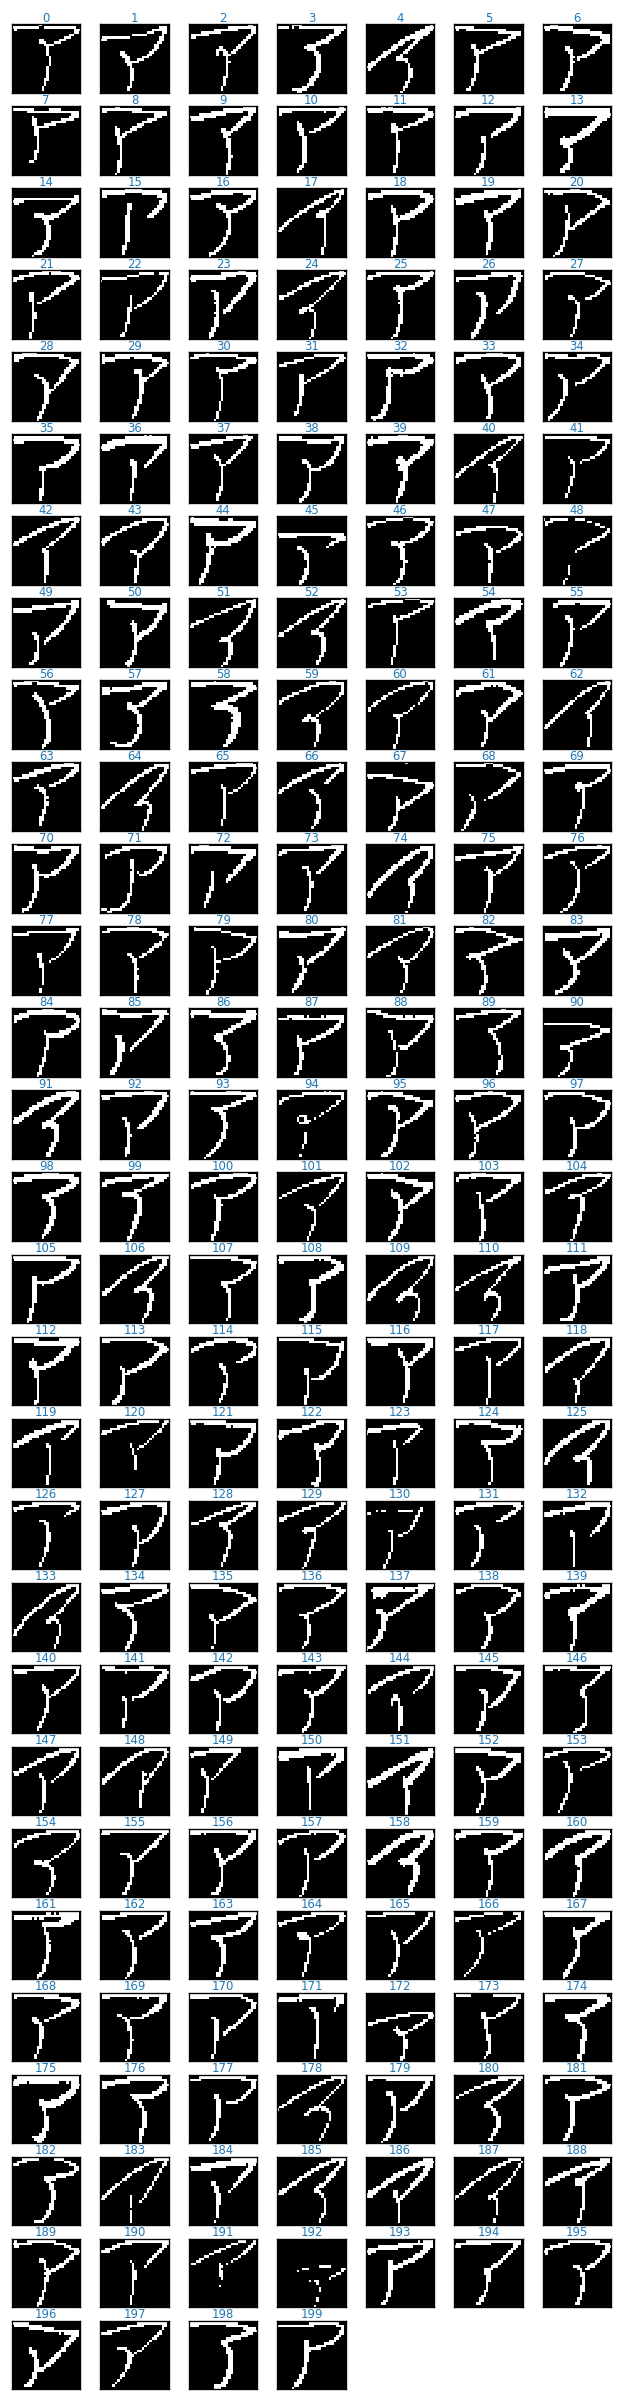

In [5]:
train_data_a_image = np.array(train_data_a).reshape(200, 28, 28)

# matplotlib 出力
n_cols = 7
n_rows = ((len(train_data_a_image)-1)//n_cols)+1
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6.5, 0.9*n_rows), dpi=120)
for i,ax in enumerate( np.ravel(ax) ):
  if i < len(train_data_a_image):
    ax.imshow(train_data_a_image[i],interpolation='nearest',vmin=0.,vmax=1.,cmap='Greys')

    # 目盛などを非表示に
    ax.tick_params(axis='both', which='both', left=False, labelleft=False, 
                   bottom=False, labelbottom=False)

    # 青色でインデックスを表示
    ax.set_title(i,fontsize=7,pad=1.5,color='tab:blue')

  else :
    ax.axis('off') # 余白処理

plt.show()

アの画像をjpgとして出力

In [25]:
pil_img = Image.fromarray(train_data_a_image[0])
# print(pil_img.mode)
# RGB
gray_img = pil_img.convert("L")
    
gray_img.save('../1_data/augmentor/a/original_a_image_0.jpg')

In [27]:
print(len(train_data_a_image))

200


In [28]:
for i in range(len(train_data_a_image)):
    pil_img = Image.fromarray(train_data_a_image[i])
# print(pil_img.mode)
# RGB
    gray_img = pil_img.convert("L")
    
    gray_img.save(f'../1_data/augmentor/a/original_a_image_{i}.jpg')

In [6]:
data_dict = {'0': train_data_a,
             '1': train_data_i,
             '2': train_data_u,
             '3': train_data_e,
             '4': train_data_o,
             '5': train_data_ka,
             '6': train_data_ki,
             '7': train_data_ku,
             '8': train_data_ke,
             '9': train_data_ko,
             '10': train_data_sa,
             '11': train_data_si,
             '12': train_data_su,
             '13': train_data_se,
             '14': train_data_so}

for i, j in list(data_dict.items()):
    j_ndarray = np.array(j).reshape(len(j), 28, 28)
    data_dict[i] = j_ndarray

print(np.array(data_dict['0']).shape)

for i, j in data_dict.items():
    for k in range(len(j)):
        pil_img = Image.fromarray(j[k])
# print(pil_img.mode)
# RGB
        gray_img = pil_img.convert("L")
    
        gray_img.save(f'../1_data/augmentor/a_to_so/{i}/original_a_image_{k}.png')

(200, 28, 28)


それぞれの文字ごとのデータセットを水増し

まずはアだけ水増ししてみる

In [57]:
print(train_data_a_image.shape)

(200, 28, 28)


In [61]:
# 回転を与える

for i in range(1):
    
    dpath_from = "../1_data/augmentor/a_to_so/1/%s"%i
    dpath_to = "../1_data/augmentor/a/%s"%i
    for dpath in [dpath_from, dpath_to]:
        if os.path.exists(dpath):
            """
            前回の結果が残っていたら消す
            """
            shutil.rmtree(dpath)
            
        
    # オブジェクトの生成
    p = Augmentor.Pipeline('../1_data/augmentor/a_to_so/1/')

    if i==0:
        p.rotate(probability=1.0, max_left_rotation=10, max_right_rotation=10)
#     elif i==1:
#         p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=8)
#     elif i==2:
#         p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=8)
#         p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    
    # 実行
    p.sample(len(train_data_a_image))
    
    # ディレクトリの名前を変更し移動
    os.rename("../1_data/augmentor/a_to_so/1/output", dpath_from)
    shutil.move(dpath_from, dpath_to)

Initialised with 200 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/1/output.

Processing <PIL.Image.Image image mode=L size=28x28


In [7]:
# #データを回転して水増し

# for i in range(len(data_dict)):
#      # オブジェクトの生成
#     p = Augmentor.Pipeline(f'../1_data/augmentor/a_to_so/{i}/')
#     p.rotate(probability=1.0, max_left_rotation=10, max_right_rotation=10)
 
#     # 実行
#     p.sample(200)

Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DBA0DD8>:   3%|▎         | 6/200 [00:00<00:05, 36.07 Samples/s]

Initialised with 200 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/0/output.

Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DBE46D8>: 100%|██████████| 200/200 [00:00<00:00, 252.67 Samples/s]
Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DB007B8>:   1%|          | 2/200 [00:00<00:12, 15.89 Samples/s]

Initialised with 200 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/1/output.

Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DBDD320>: 100%|██████████| 200/200 [00:00<00:00, 242.07 Samples/s]
Executing Pipeline:   0%|          | 0/200 [00:00<?, ? Samples/s]

Initialised with 201 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/2/output.

Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12C16F588>: 100%|██████████| 200/200 [00:01<00:00, 143.45 Samples/s]
Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DAABF98>:   1%|          | 2/200 [00:00<00:14, 13.95 Samples/s]

Initialised with 200 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/3/output.

Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DBDCC18>: 100%|██████████| 200/200 [00:00<00:00, 233.56 Samples/s]
Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DA65240>:   1%|          | 2/200 [00:00<00:09, 20.00 Samples/s]

Initialised with 200 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/4/output.

Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DBD1978>: 100%|██████████| 200/200 [00:00<00:00, 227.43 Samples/s]
Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DC088D0>:   2%|▏         | 4/200 [00:00<00:09, 20.42 Samples/s]

Initialised with 181 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/5/output.

Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DBDC860>: 100%|██████████| 200/200 [00:00<00:00, 279.25 Samples/s]
Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DB96208>:   2%|▏         | 4/200 [00:00<00:14, 13.34 Samples/s]

Initialised with 157 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/6/output.

Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DBEB6D8>: 100%|██████████| 200/200 [00:01<00:00, 146.90 Samples/s]
Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DA61C88>:   1%|          | 2/200 [00:00<00:13, 14.92 Samples/s]

Initialised with 174 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/7/output.

Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DBE7550>: 100%|██████████| 200/200 [00:00<00:00, 83.26 Samples/s]
Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DBD4470>:   3%|▎         | 6/200 [00:00<00:08, 23.59 Samples/s]

Initialised with 142 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/8/output.

Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DBD1D68>: 100%|██████████| 200/200 [00:01<00:00, 194.34 Samples/s]
Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DB975F8>:   2%|▎         | 5/200 [00:00<00:25,  7.58 Samples/s]

Initialised with 170 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/9/output.

Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DAA5898>: 100%|██████████| 200/200 [00:00<00:00, 245.23 Samples/s]
Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF125FBED68>:   0%|          | 1/200 [00:00<00:22,  8.96 Samples/s]

Initialised with 125 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/10/output.

Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DBE79B0>: 100%|██████████| 200/200 [00:00<00:00, 301.43 Samples/s]
Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DACFF98>:   2%|▏         | 4/200 [00:00<00:10, 18.40 Samples/s]

Initialised with 158 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/11/output.

Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DC000F0>: 100%|██████████| 200/200 [00:01<00:00, 171.94 Samples/s]
Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DBDC748>:   2%|▏         | 3/200 [00:00<00:09, 19.73 Samples/s]

Initialised with 174 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/12/output.

Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DBEB278>: 100%|██████████| 200/200 [00:00<00:00, 229.01 Samples/s]
Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DBA1630>:   2%|▏         | 4/200 [00:00<00:10, 18.22 Samples/s]

Initialised with 146 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/13/output.

Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DBE7CF8>: 100%|██████████| 200/200 [00:01<00:00, 181.52 Samples/s]
Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DA60DD8>:   1%|          | 2/200 [00:00<00:14, 13.38 Samples/s]

Initialised with 190 image(s) found.
Output directory set to ../1_data/augmentor/a_to_so/14/output.

Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FF12DBD4898>: 100%|██████████| 200/200 [00:00<00:00, 212.73 Samples/s]


水増しした画像を読み込んで元のデータセットと合体する

In [73]:
im = Image.open('../1_data/augmentor/a_to_so/0/output/*.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '../1_data/augmentor/a_to_so/0/output/*.jpg'

In [72]:
print(np.array(im).shape)

(28, 28)


In [6]:
# 画像が保存されたフォルダのパスを指定する
folder_path = "../1_data/augmentor/a_to_so/0/output"

# フォルダ内のjpeg画像を読み込む
image_list = []
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        image_path = os.path.join(folder_path, filename)
        with Image.open(image_path) as img:
            image_list.append(np.asarray(img))

# すべての画像を1つのndarrayの3次元配列に変換する
image_array = np.stack(image_list)

# image_arrayのshapeを表示する
print(image_array.shape)

(200, 28, 28)


画像を表示して確認する

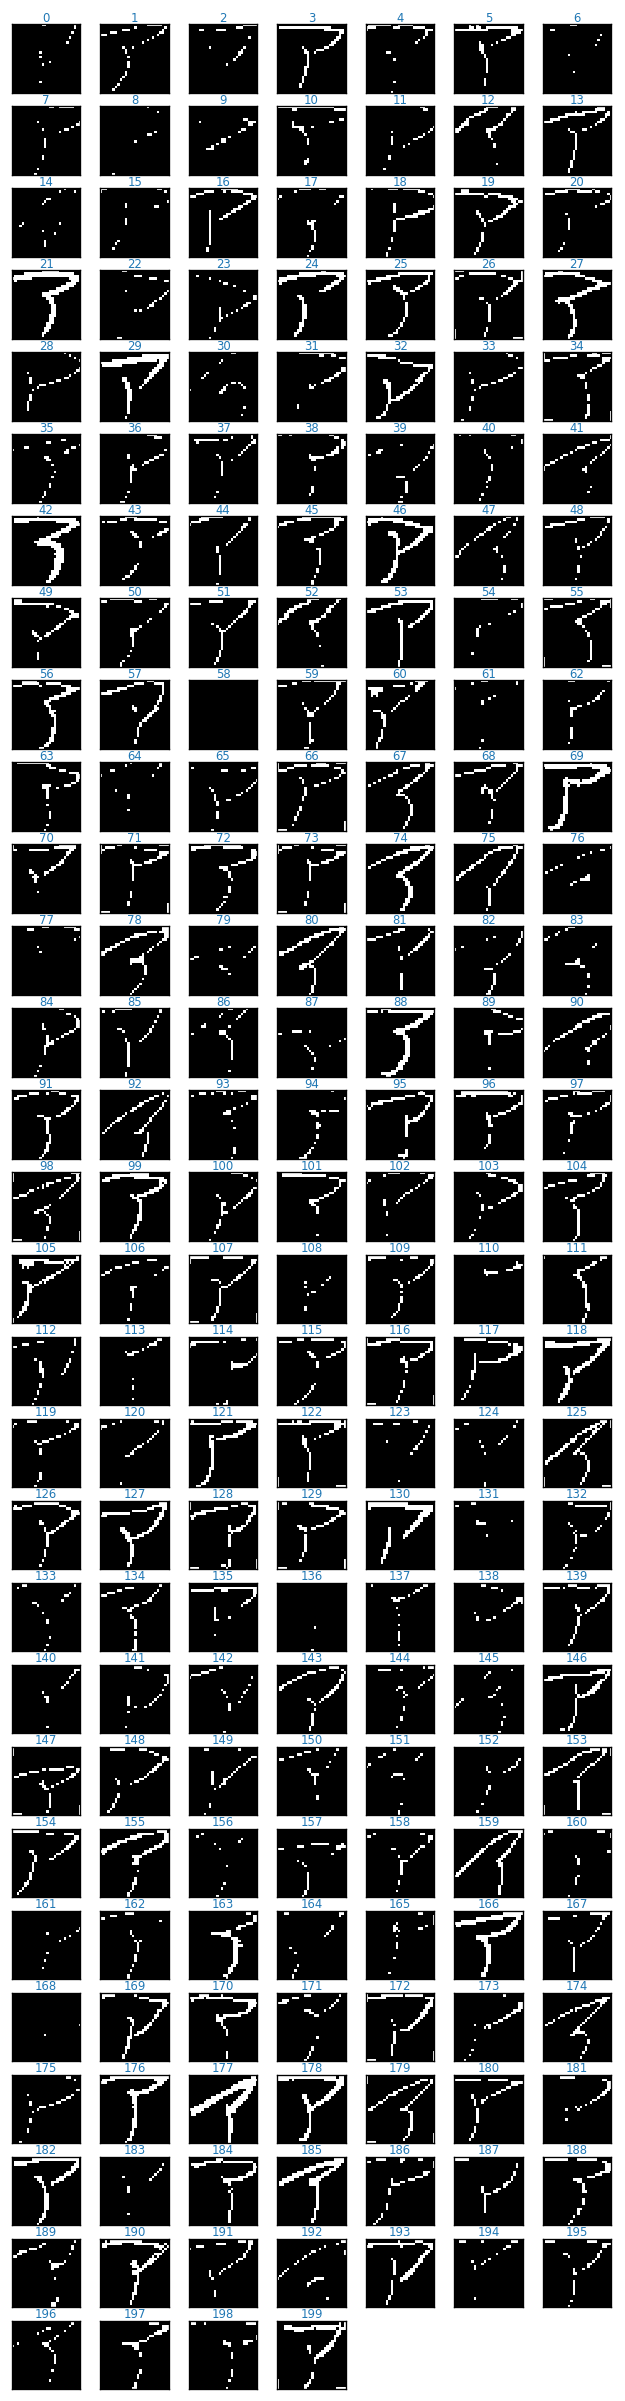

In [7]:
# matplotlib 出力
n_cols = 7
n_rows = ((len(image_array)-1)//n_cols)+1
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6.5, 0.9*n_rows), dpi=120)
for i,ax in enumerate( np.ravel(ax) ):
  if i < len(image_array):
    ax.imshow(image_array[i],interpolation='nearest',vmin=0.,vmax=1.,cmap='Greys')

    # 目盛などを非表示に
    ax.tick_params(axis='both', which='both', left=False, labelleft=False, 
                   bottom=False, labelbottom=False)

    # 青色でインデックスを表示
    ax.set_title(i,fontsize=7,pad=1.5,color='tab:blue')

  else :
    ax.axis('off') # 余白処理

plt.show()

目視で人がアと判別できないものは削除

In [82]:
# del_candidate_a = [0, 3, 12, 15, 21,
#                    27, 28, 38, 60, 72,
#                    75, 81, 92, 97, 101,
#                    111, 116, 133, 140, 142,
#                    145, 148, 149, 157, 164,
#                    168, 169, 170, 180]

In [ ]:
del_candidate_a = [0, 2, 6, 7, 8,
                                   8, 9, 11, 14, 15, 
                                    ]

In [83]:
aug_data_a_image_w_pre_prcs_ls = []
for i in range(len(image_array)):
    if i not in del_candidate_a: aug_data_a_image_w_pre_prcs_ls.append(image_array[i])

aug_data_a_image_w_pre_prcs = np.array(aug_data_a_image_w_pre_prcs_ls)

print(aug_data_a_image_w_pre_prcs.shape)
print(aug_data_a_image_w_pre_prcs)

(171, 28, 28)
[[[255 255 255 ...  52  50  51]
  [255 255 255 ...   4  62  28]
  [255 255 255 ... 152 177  43]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 254 255 ...   9   0 155]
  [255 255 240 ...   1   0  14]
  [255 255  92 ...   0   0  80]
  ...
  [170  28   0 ... 255 255 255]
  [  0   5  43 ... 255 255 255]
  [  0  77 255 ... 255 255 255]]

 [[  0   0   0 ... 137 242   0]
  [ 74  44  45 ...   0  86   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0 255 255 ... 255 255 255]
  [  0 255 255 ... 255 255 255]
  [  0 255 255 ...   0   0   0]]

 ...

 [[255 255 255 ... 134 246 255]
  [255 255 255 ...  27 104 185]
  [255 255 255 ...  38   4  43]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 145   0 106]
  [255 255 255 ...  41  28 229]
  [254 182 170 ...   2  36 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255